In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [2]:
np.random.seed(42)

num_users = 1000
data = {
    'user_id': range(1, num_users + 1),
    'email_version': ['A']*500 + ['B']*500,
    'opened': np.concatenate([
        np.random.binomial(1, 0.30, 500),  # 30% open rate for Email A
        np.random.binomial(1, 0.40, 500)   # 40% open rate for Email B
    ])
}

df = pd.DataFrame(data)

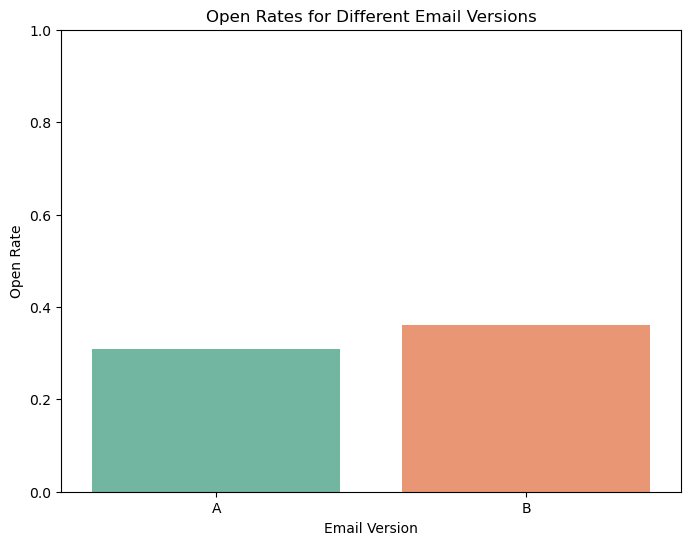

In [3]:
open_rates = df.groupby('email_version')['opened'].mean().reset_index()
open_rates.columns = ['Email Version', 'Open Rate']

plt.figure(figsize=(8, 6))
sns.barplot(x='Email Version', y='Open Rate', hue='Email Version', data=open_rates, palette='Set2', legend=False)
plt.title('Open Rates for Different Email Versions')
plt.ylabel('Open Rate')
plt.xlabel('Email Version')
plt.ylim(0, 1)
plt.show()

In [4]:
contingency_table = pd.crosstab(df['email_version'], df['opened'])
print(contingency_table)


chi2, p, _, _ = stats.chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2:.2f}")
print(f"P-Value: {p:.4f}")


alpha = 0.05
if p < alpha:
    print("The difference is statistically significant.")
else:
    print("The difference is not statistically significant.")

opened           0    1
email_version          
A              346  154
B              320  180
Chi-Square Statistic: 2.81
P-Value: 0.0937
The difference is not statistically significant.
